# WeatherPy

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

from api_keys import weather_api_key

from citipy import citipy


In [2]:
lat_lngs = []
cities = []

lat_range = (-90, 90)
lng_range = (-180, 180)

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    if city not in cities:
        cities.append(city)


print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 570


In [3]:
url =  f"http://api.openweathermap.org/data/2.5/weather"


city_data = []
print("Beginning Data Retrieval       ")
print("-------------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):

    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    record_count += 1
    #reposnse = requests.get(city_url)
    try: 
        city_weather = requests.get(city_url).json()
    
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass

    time.sleep(1)

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 | al qadarif
Processing Record 2 of Set 1 | klyuchi
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | petropavlovsk-kamchatsky
Processing Record 6 of Set 1 | worcester
Processing Record 7 of Set 1 | tura
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | long beach
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | broken hill
Processing Record 12 of Set 1 | kemer
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | hamilton
Processing Record 17 of Set 1 | yamada
Processing Record 18 of Set 1 | metlili chaamba
Processing Record 19 of Set 1 | lensk
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | berdigestyakh
Processing Recor

In [4]:
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [27]:
city_data_df['Max Temp']=city_data_df['Max Temp']-273.15
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,al qadarif,14.0349,35.3834,27.51,37,0,4.11,SD,1730932466
1,klyuchi,52.2667,79.1667,1.64,50,46,11.16,RU,1730932468
2,tiksi,71.6872,128.8694,-13.51,79,100,5.62,RU,1730932469
3,olonkinbyen,70.9221,-8.7187,-2.15,80,41,12.36,SJ,1730932470
4,petropavlovsk-kamchatsky,53.0452,158.6483,-7.67,49,0,2.00,RU,1730932471


In [28]:
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,al qadarif,14.0349,35.3834,27.51,37,0,4.11,SD,1730932466
1,klyuchi,52.2667,79.1667,1.64,50,46,11.16,RU,1730932468
2,tiksi,71.6872,128.8694,-13.51,79,100,5.62,RU,1730932469
3,olonkinbyen,70.9221,-8.7187,-2.15,80,41,12.36,SJ,1730932470
4,petropavlovsk-kamchatsky,53.0452,158.6483,-7.67,49,0,2.00,RU,1730932471


## Latitude Vs. Temperature

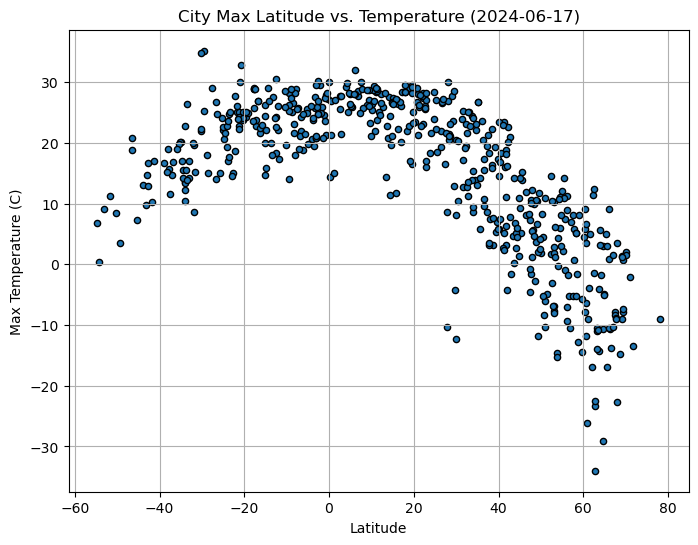

In [30]:
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,6), edgecolor="black", 
                  title="City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude Vs. Humidity

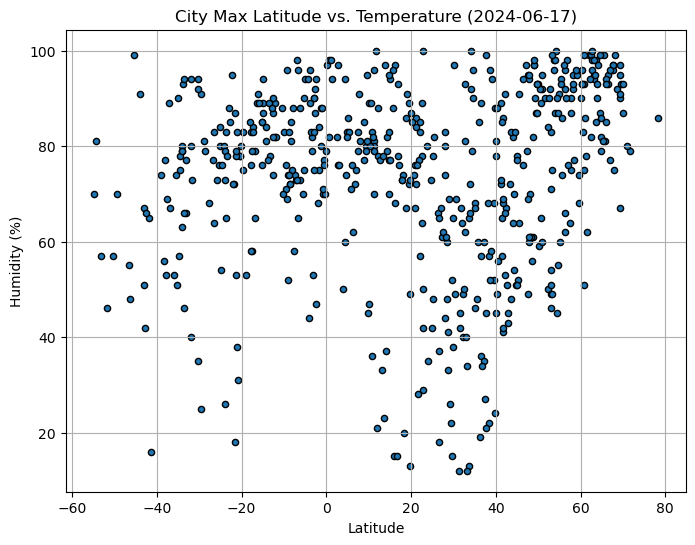

In [31]:
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,6), edgecolor="black", 
                  title="City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude Vs. Cloudiness

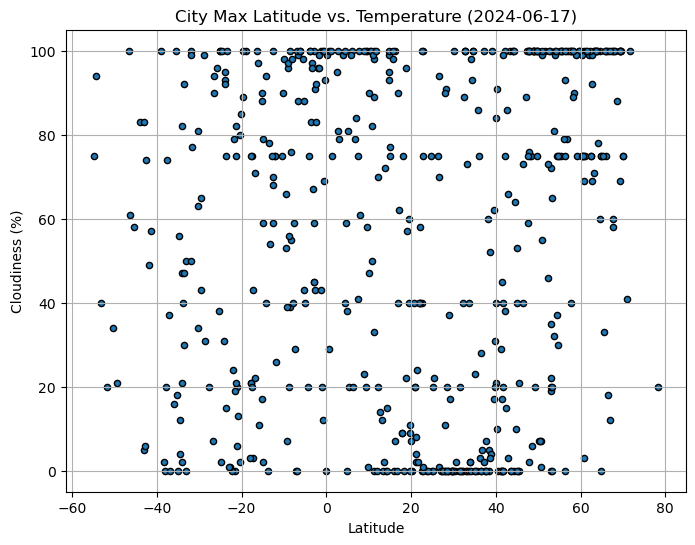

In [32]:
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,6), edgecolor="black", 
                  title="City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude Vs. Wind Speed Plot

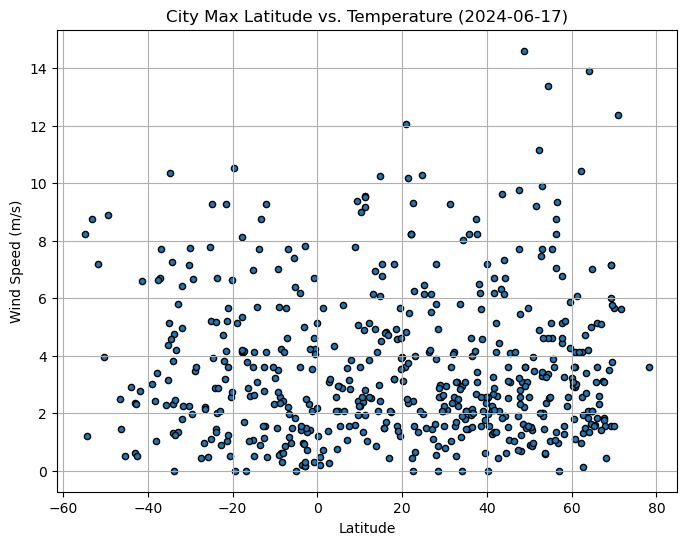

In [33]:
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,6), edgecolor="black", 
                  title="City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.savefig("output_data/Fig3.png")
plt.show()

# Requirement 2: Linear Regression

In [34]:
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]
northern_hemi_df .head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,al qadarif,14.0349,35.3834,27.51,37,0,4.11,SD,1730932466
1,klyuchi,52.2667,79.1667,1.64,50,46,11.16,RU,1730932468
2,tiksi,71.6872,128.8694,-13.51,79,100,5.62,RU,1730932469
3,olonkinbyen,70.9221,-8.7187,-2.15,80,41,12.36,SJ,1730932470
4,petropavlovsk-kamchatsky,53.0452,158.6483,-7.67,49,0,2.00,RU,1730932471


In [35]:
southern_hemi_df = city_data_df[city_data_df["Lat"]<=0]
southern_hemi_df .head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,puerto ayora,-0.7393,-90.3518,21.30,70,12,4.61,EC,1730932450
9,grytviken,-54.2811,-36.5092,0.34,81,94,1.22,GS,1730932476
10,broken hill,-31.9500,141.4333,19.62,40,100,4.95,AU,1730932214
13,edinburgh of the seven seas,-37.0676,-12.3116,14.71,89,37,6.71,SH,1730932481
14,carnarvon,-24.8667,113.6333,20.65,54,2,9.28,AU,1730932482


The r^2-value is: 0.6806197500307412


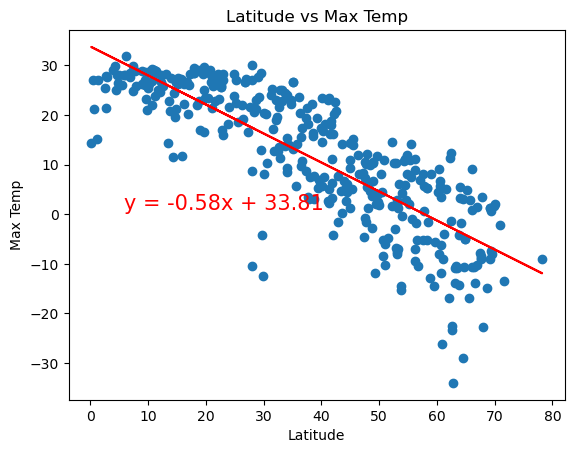

In [36]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.4206663431740106


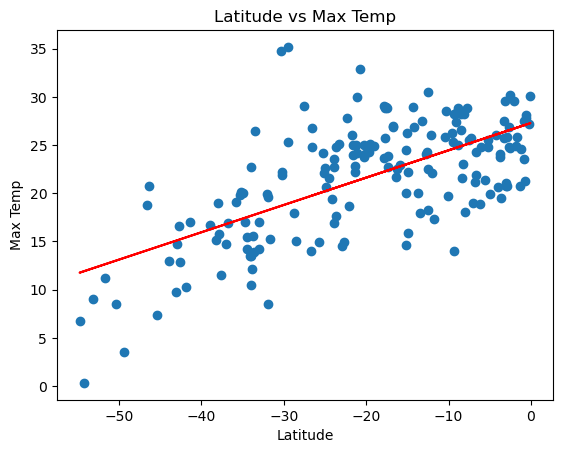

In [37]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

### Discussion here

## Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.059141440326816806


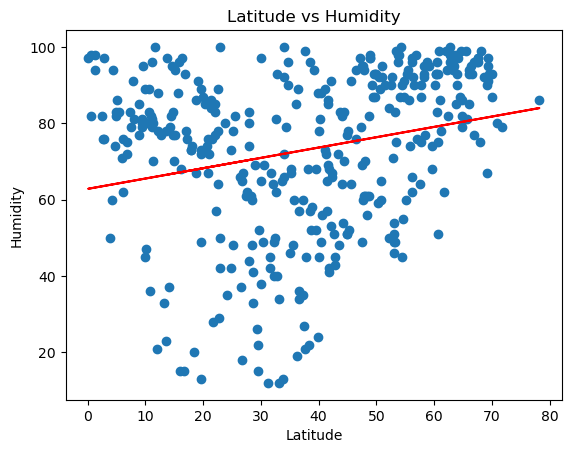

In [38]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.09630725388103506


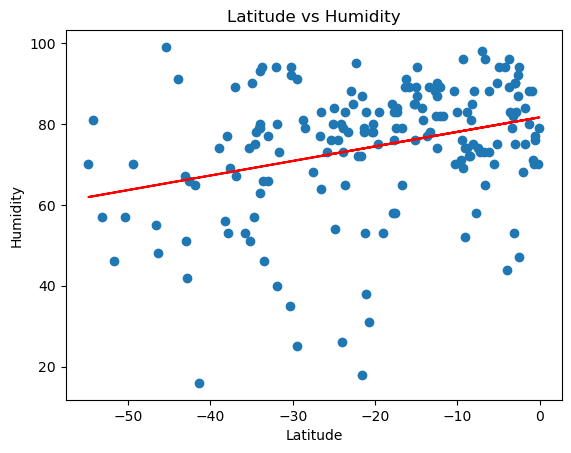

In [39]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

## Discussion

## Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.05932723657113637


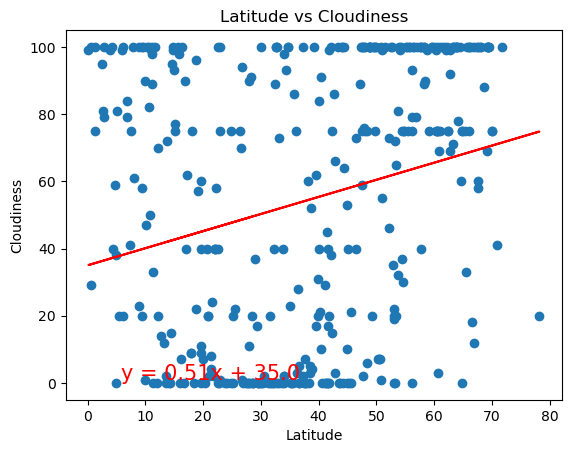

In [40]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.04618140695849795


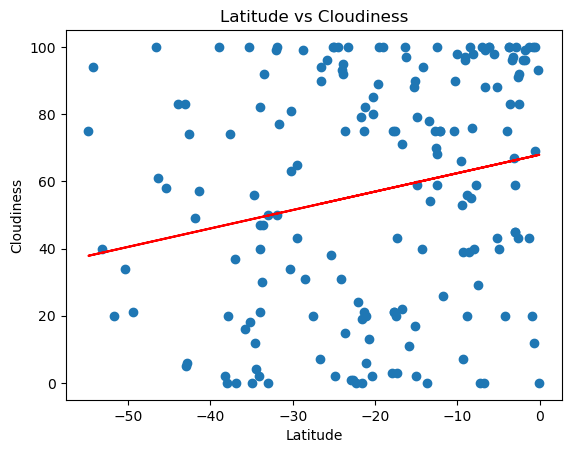

In [41]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

## Discussion

## Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0007093129917877492


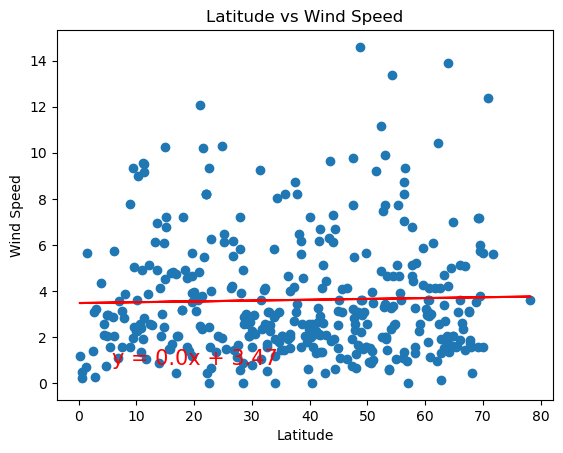

In [42]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.04618140695849795


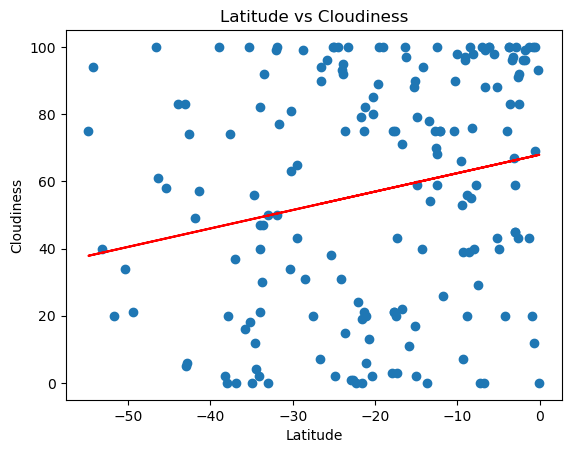

In [43]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

## Discussion